Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef, precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.pipeline import make_pipeline

Loading and Splitting the Dataset into the Training set and Test set

In [3]:
# Load dataset
dataset = pd.read_csv("./data/diabetes/diabetes_data_upload.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


Label Encoding

In [4]:
le = LabelEncoder()
for i in range(1, 16):
    X[:, i] = le.fit_transform(X[:, i])
print(X)

[[40 1 0 ... 1 1 1]
 [58 1 0 ... 0 1 0]
 [41 1 1 ... 1 1 0]
 ...
 [58 0 1 ... 1 0 1]
 [32 0 0 ... 0 1 0]
 [42 1 0 ... 0 0 0]]


Splitting the dataset into the Training set and Test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

Feature Scaling

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the Logistic Regression model on the Training set

In [7]:
# liblinear solver is more suitable for small to medium-sized datasets and might handle convergence better.
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Predicting the Test set results

In [8]:
y_pred = classifier.predict(X_test)
# Convert y_test to a numpy array and reshape both arrays
y_test_array = np.array(y_test).reshape(-1, 1)
y_pred_array = y_pred.reshape(-1, 1)

# Define a mapping from string labels to integers
label_mapping = {'Positive': 1, 'Negative': 0}

# Apply the mapping to the arrays
y_test_mapped = np.vectorize(label_mapping.get)(y_test_array)
y_pred_mapped = np.vectorize(label_mapping.get)(y_pred_array)

# Concatenate the predictions and the true values
result = np.concatenate((y_pred_mapped, y_test_mapped), axis=1)

# Print the result
print(result)

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]

Making the Confusion Matrix

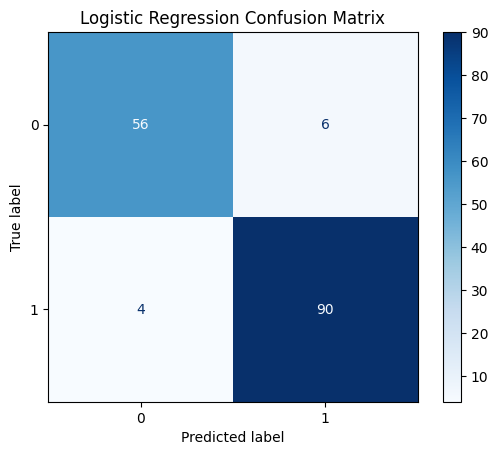

In [9]:
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

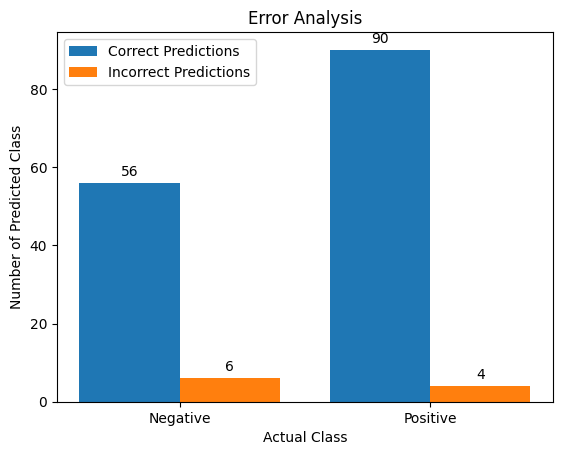

In [10]:
# Calculate the number of correct and incorrect predictions
correct_predictions = np.diag(cm)
incorrect_predictions = cm.sum(axis=1) - correct_predictions

# Plot the errors
labels = np.unique(y_test)
x = np.arange(len(labels))

fig, ax = plt.subplots()
bar1 = ax.bar(x - 0.2, correct_predictions, 0.4, label='Correct Predictions')
bar2 = ax.bar(x + 0.2, incorrect_predictions, 0.4, label='Incorrect Predictions')

ax.set_xlabel('Actual Class')
ax.set_ylabel('Number of Predicted Class')
ax.set_title('Error Analysis')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding text labels
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

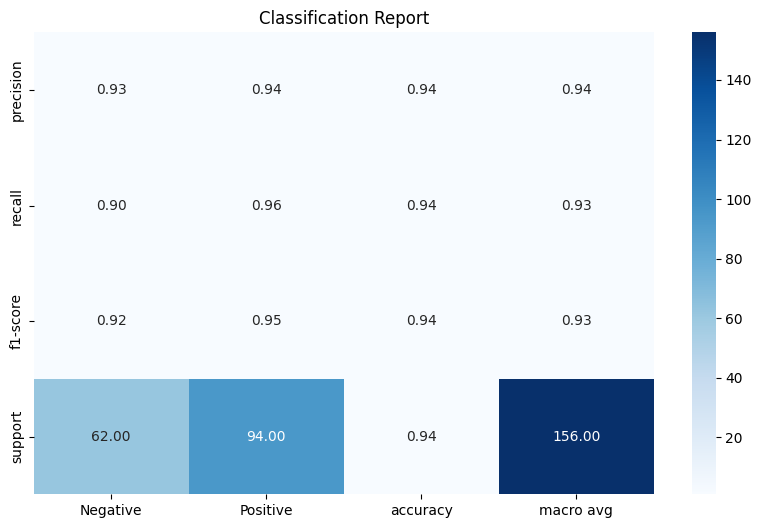

In [11]:
# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report')
plt.show()

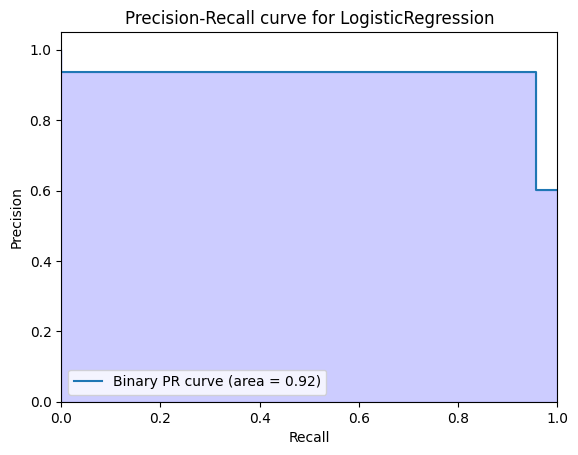

In [12]:
# Compute Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test_mapped, y_pred_mapped)
average_precision = average_precision_score(y_test_mapped, y_pred_mapped)

# Plot Precision-Recall curve
plt.figure()
plt.step(recall, precision, where='post')

plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for LogisticRegression')
plt.legend([f'Binary PR curve (area = {average_precision:0.2f})'], loc='lower left')
plt.show()

Evaluation Metrics

In [13]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print("Precision: {:.2f} %".format(precision*100))
print("Recall: {: .2f} %".format(recall*100))

pipeline = make_pipeline(StandardScaler(), classifier)
# Train the classifier on the full training set
pipeline.fit(X_train, y_train)

# Predict the test set
y_pred = pipeline.predict(X_test)
# Calculate AUC
if len(set(y_train)) == 2:  # Check if binary classification
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC: {:.2f} %".format(auc*100))

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score: {:.2f} %".format(f1*100))

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa: {:.2f}".format(kappa))

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient (MCC): {:.2f}".format(mcc))

Accuracy: 92.30 %
Standard Deviation: 3.68 %
Precision: 93.58 %
Recall:  93.59 %
AUC: 97.60 %
F1-score: 93.57 %
Cohen's Kappa: 0.87
Matthews Correlation Coefficient (MCC): 0.87


Predicting the result of a single observation

In [16]:
single_observation = [[67, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]]
single_prediction = pipeline.predict(single_observation)
single_prediction = (single_prediction)
single_prediction_proba = pipeline.predict_proba(single_observation)[:, 1]  # Probability of being a diabetes patient
if single_prediction[0] == 1:
    prediction_label = "Diabetes Patient"
else:
    prediction_label = "Not a Diabetes Patient"

print(f"Prediction: {prediction_label}")
print(f"Prediction Probability of being a Diabetes Patient: {single_prediction_proba[0]:.20f}")

Prediction: Not a Diabetes Patient
Prediction Probability of being a Diabetes Patient: 0.00000000000106655064
